In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
path = './src/listings.csv'
data = pd.read_csv(path, header=0, sep=',')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,26660141,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS",200407698,Sylvie,NaN,Buttes-Chaumont,48.88050,2.41413,Entire home/apt,90,5,17,2022-05-02,0.38,1,30,4,NaN
1,25177338,Cosy and quiet appartement at Les Lilas,185793394,Muriel,NaN,Buttes-Chaumont,48.88039,2.41240,Entire home/apt,59,2,17,2020-03-06,0.35,1,1,0,NaN
2,623577357754054753,Superbe studio proche Paris / Alfortville,21206227,Morgane,NaN,Reuilly,48.81002,2.41724,Entire home/apt,30,1,2,2022-06-02,2.00,2,317,2,NaN
3,9396150,Cosy studio sur cour fleurie. Métro Saint-Man...,5783938,Alexandra,NaN,Ménilmontant,48.84782,2.42054,Entire home/apt,53,7,7,2022-06-02,0.34,1,308,5,NaN
4,25218084,paris avec une maison,190542280,Laure (Jade),NaN,Batignolles-Monceau,48.90180,2.31366,Entire home/apt,500,7,2,2020-01-02,0.05,1,0,0,NaN


### Nombre de logements

In [4]:
print('Nombre de logements :',data.shape[0])

Nombre de logements : 56739


### Differents quartiers dans Paris

In [19]:
print('Differents quartiers de Paris:\n','\n '.join(data["neighbourhood"].unique()))

Differents quartiers de Paris:
 Buttes-Chaumont
 Reuilly
 Ménilmontant
 Batignolles-Monceau
 Buttes-Montmartre
 Passy
 Observatoire
 Gobelins
 Vaugirard
 Hôtel-de-Ville
 Opéra
 Louvre
 Panthéon
 Popincourt
 Entrepôt
 Luxembourg
 Temple
 Élysée
 Bourse
 Palais-Bourbon


### Différents types de chambres

In [18]:
print('Diffenrents types de rooms :\n', ' \n '.join(data["room_type"].unique()))

Diffenrents types de rooms :
 Entire home/apt 
 Private room 
 Shared room 
 Hotel room


### Les 3 arrondissements qui proposent le plus de logements

In [20]:
ct = pd.crosstab(data["neighbourhood"], "NbLogements")
ct = ct.sort_values("NbLogements", ascending = False)
print('Voici les 3 arrondissements avec le plus de logements')
ct.head(3)

Voici les 3 arrondissements avec le plus de logements


col_0,NbLogements
neighbourhood,
Buttes-Montmartre,5775
Popincourt,4669
Vaugirard,4230


### Description de `price`, `number_of_reviews` et `reviews_per_month`

In [21]:
data.filter(["price", "number_of_reviews", "reviews_per_month"]).describe().round(2)

,price,number_of_reviews,reviews_per_month
count,56739.00,56739.00,45281.00
mean,163.96,23.77,0.98
std,370.77,51.03,1.54
min,0.00,0.00,0.01
25%,65.00,1.00,0.14
50%,97.00,6.00,0.46
75%,160.00,24.00,1.22
max,15550.00,2317.00,85.17


#### `price`

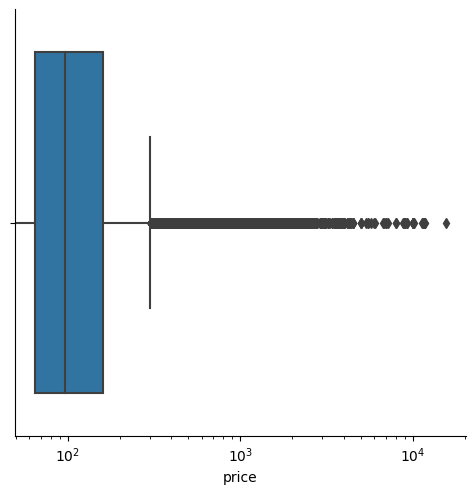

In [22]:
g = seaborn.catplot(data=data, x="price", kind="box")
g.fig.axes[0].set_xscale('log')

#### `number_of_reviews`

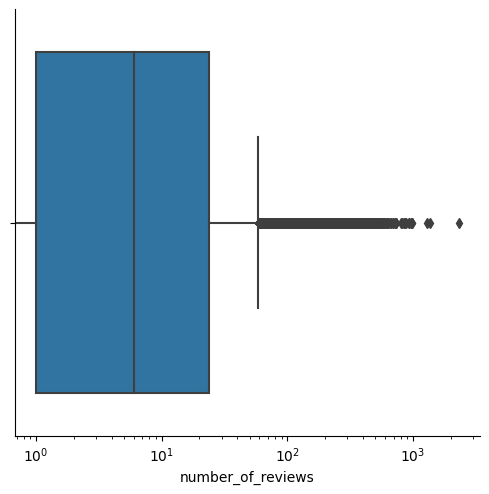

In [23]:
g = seaborn.catplot(data=data, x="number_of_reviews", kind="box")
g.fig.axes[0].set_xscale('log')

#### `reviews_per_month`

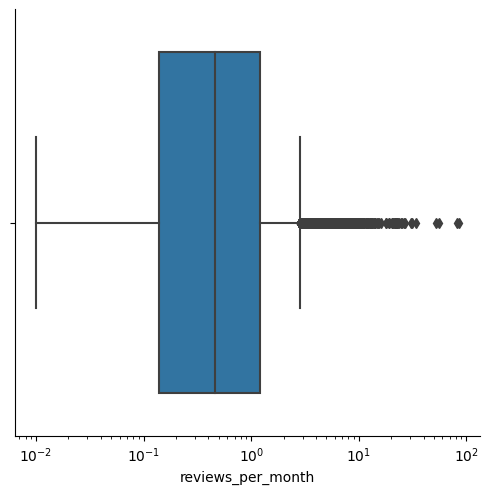

In [24]:
g = seaborn.catplot(data=data, x="reviews_per_month", kind="box")
g.fig.axes[0].set_xscale('log')

### Description de `room_type` et `neighboorhood`

#### `room_type`

In [25]:
pd.crosstab(data["room_type"], "#")

col_0,#
room_type,
Entire home/apt,47394
Hotel room,1104
Private room,7852
Shared room,389


In [27]:
# normalized=True : 0 <= valeurs <= 1
pd.crosstab(data["room_type"], "%", normalize=True)

col_0,%
room_type,
Entire home/apt,0.835298
Hotel room,0.019458
Private room,0.138388
Shared room,0.006856


In [30]:
tab_room = pd.concat(
    [
        pd.crosstab(data["room_type"], "#"),
        (pd.crosstab(data["room_type"], "%", normalize=True) * 100).round(2)
    ], 
    axis=1).sort_values("#", ascending= False)

tab_room

col_0,#,%
room_type,,
Entire home/apt,47394,83.53
Private room,7852,13.84
Hotel room,1104,1.95
Shared room,389,0.69


<Axes: xlabel='room_type', ylabel='count'>

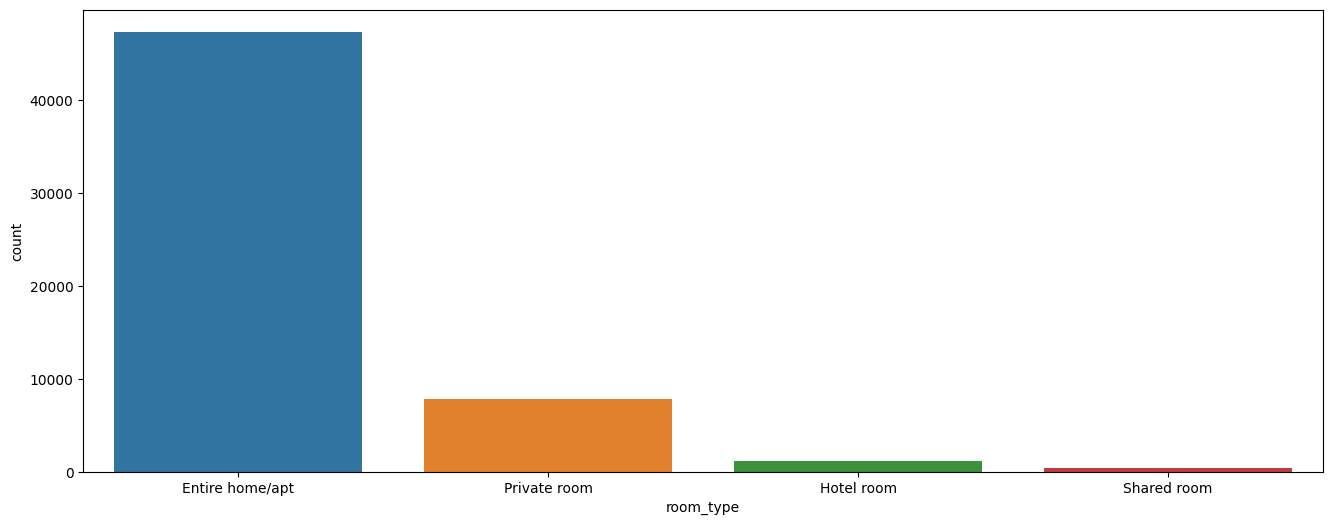

In [31]:
plt.figure(figsize=(16,6))
seaborn.countplot(data=data, x="room_type", order=tab_room.index)

#### `neighboorhood`

In [32]:
tab_neigh = pd.concat(
    [
        pd.crosstab(data["neighbourhood"], "#"),
        (pd.crosstab(data["neighbourhood"], "%", normalize=True) * 100).round(2)
    ], 
    axis=1).sort_values("#", ascending=False)

tab_neigh

col_0,#,%
neighbourhood,,
Buttes-Montmartre,5775,10.18
Popincourt,4669,8.23
Vaugirard,4230,7.46
Batignolles-Monceau,4173,7.35
Passy,4122,7.26
Entrepôt,3611,6.36
Buttes-Chaumont,3346,5.90
Ménilmontant,3234,5.70
Reuilly,3107,5.48


<Axes: xlabel='count', ylabel='neighbourhood'>

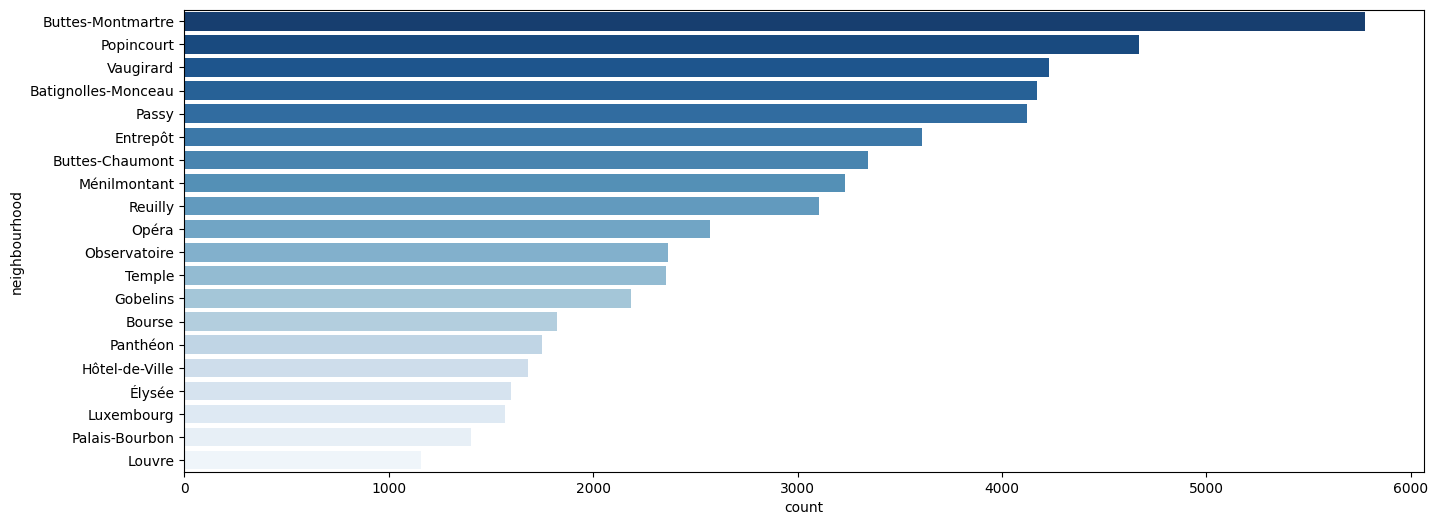

In [33]:
plt.figure(figsize = (16,6))
sns.countplot(data=data, y="neighbourhood", order=tab_neigh.index, palette = "Blues_r")

### Lien entre `price` et `room_type`

In [35]:
tab_avg_r = data.groupby("room_type")["price"] \
            .agg(PrixMoyen=np.mean) \
            .sort_values("PrixMoyen", ascending=False) \
            .round(2)

tab_avg

,PrixMoyen
room_type,
Hotel room,351.28
Entire home/apt,167.04
Private room,124.44
Shared room,54.89


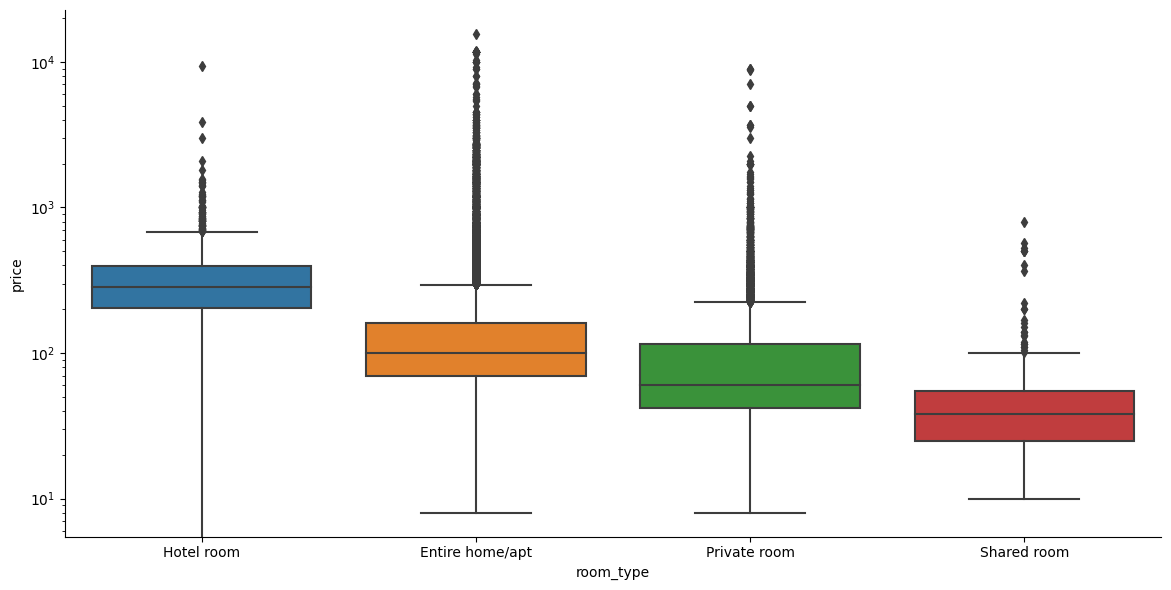

In [36]:
g = sns.catplot(data=data, x="room_type", y="price", kind="box",
                    order=tab_avg_r.index, height=6, aspect=2)

g.fig.axes[0].set_yscale('log')

### Lien entre `price` et `neighboorhood`

In [37]:
tab_avg_n = data.groupby("neighbourhood")["price"] \
            .agg(PrixMoyen=np.mean) \
            .sort_values("PrixMoyen", ascending=False) \
            .round(2)

tab_avg_n

,PrixMoyen
neighbourhood,
Élysée,366.18
Bourse,304.00
Louvre,271.03
Luxembourg,257.77
Palais-Bourbon,245.92
Temple,230.94
Opéra,218.41
Hôtel-de-Ville,216.24
Passy,206.19


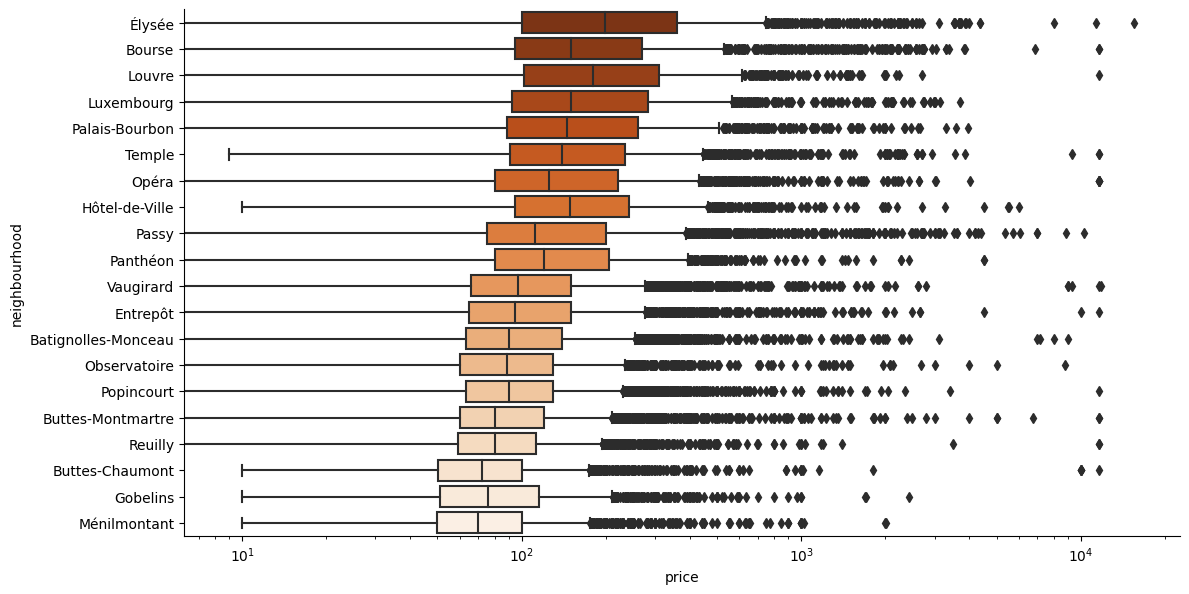

In [38]:
g = seaborn.catplot(data=data, y="neighbourhood", x="price", kind="box",
                    order=tab_avg_n.index, palette="Oranges_r", height=6, aspect=2)

g.fig.axes[0].set_xscale('log')

### Lien entre `room_type` et `neighboorhood`

In [39]:
pd.crosstab(data["neighbourhood"], data["room_type"], normalize="index").round(2)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Batignolles-Monceau,0.82,0.02,0.15,0.01
Bourse,0.88,0.02,0.10,0.00
Buttes-Chaumont,0.81,0.00,0.17,0.01
Buttes-Montmartre,0.87,0.01,0.12,0.00
Entrepôt,0.84,0.01,0.14,0.01
Gobelins,0.75,0.01,0.22,0.03
Hôtel-de-Ville,0.89,0.01,0.10,0.01
Louvre,0.82,0.05,0.12,0.00
Luxembourg,0.79,0.06,0.14,0.00


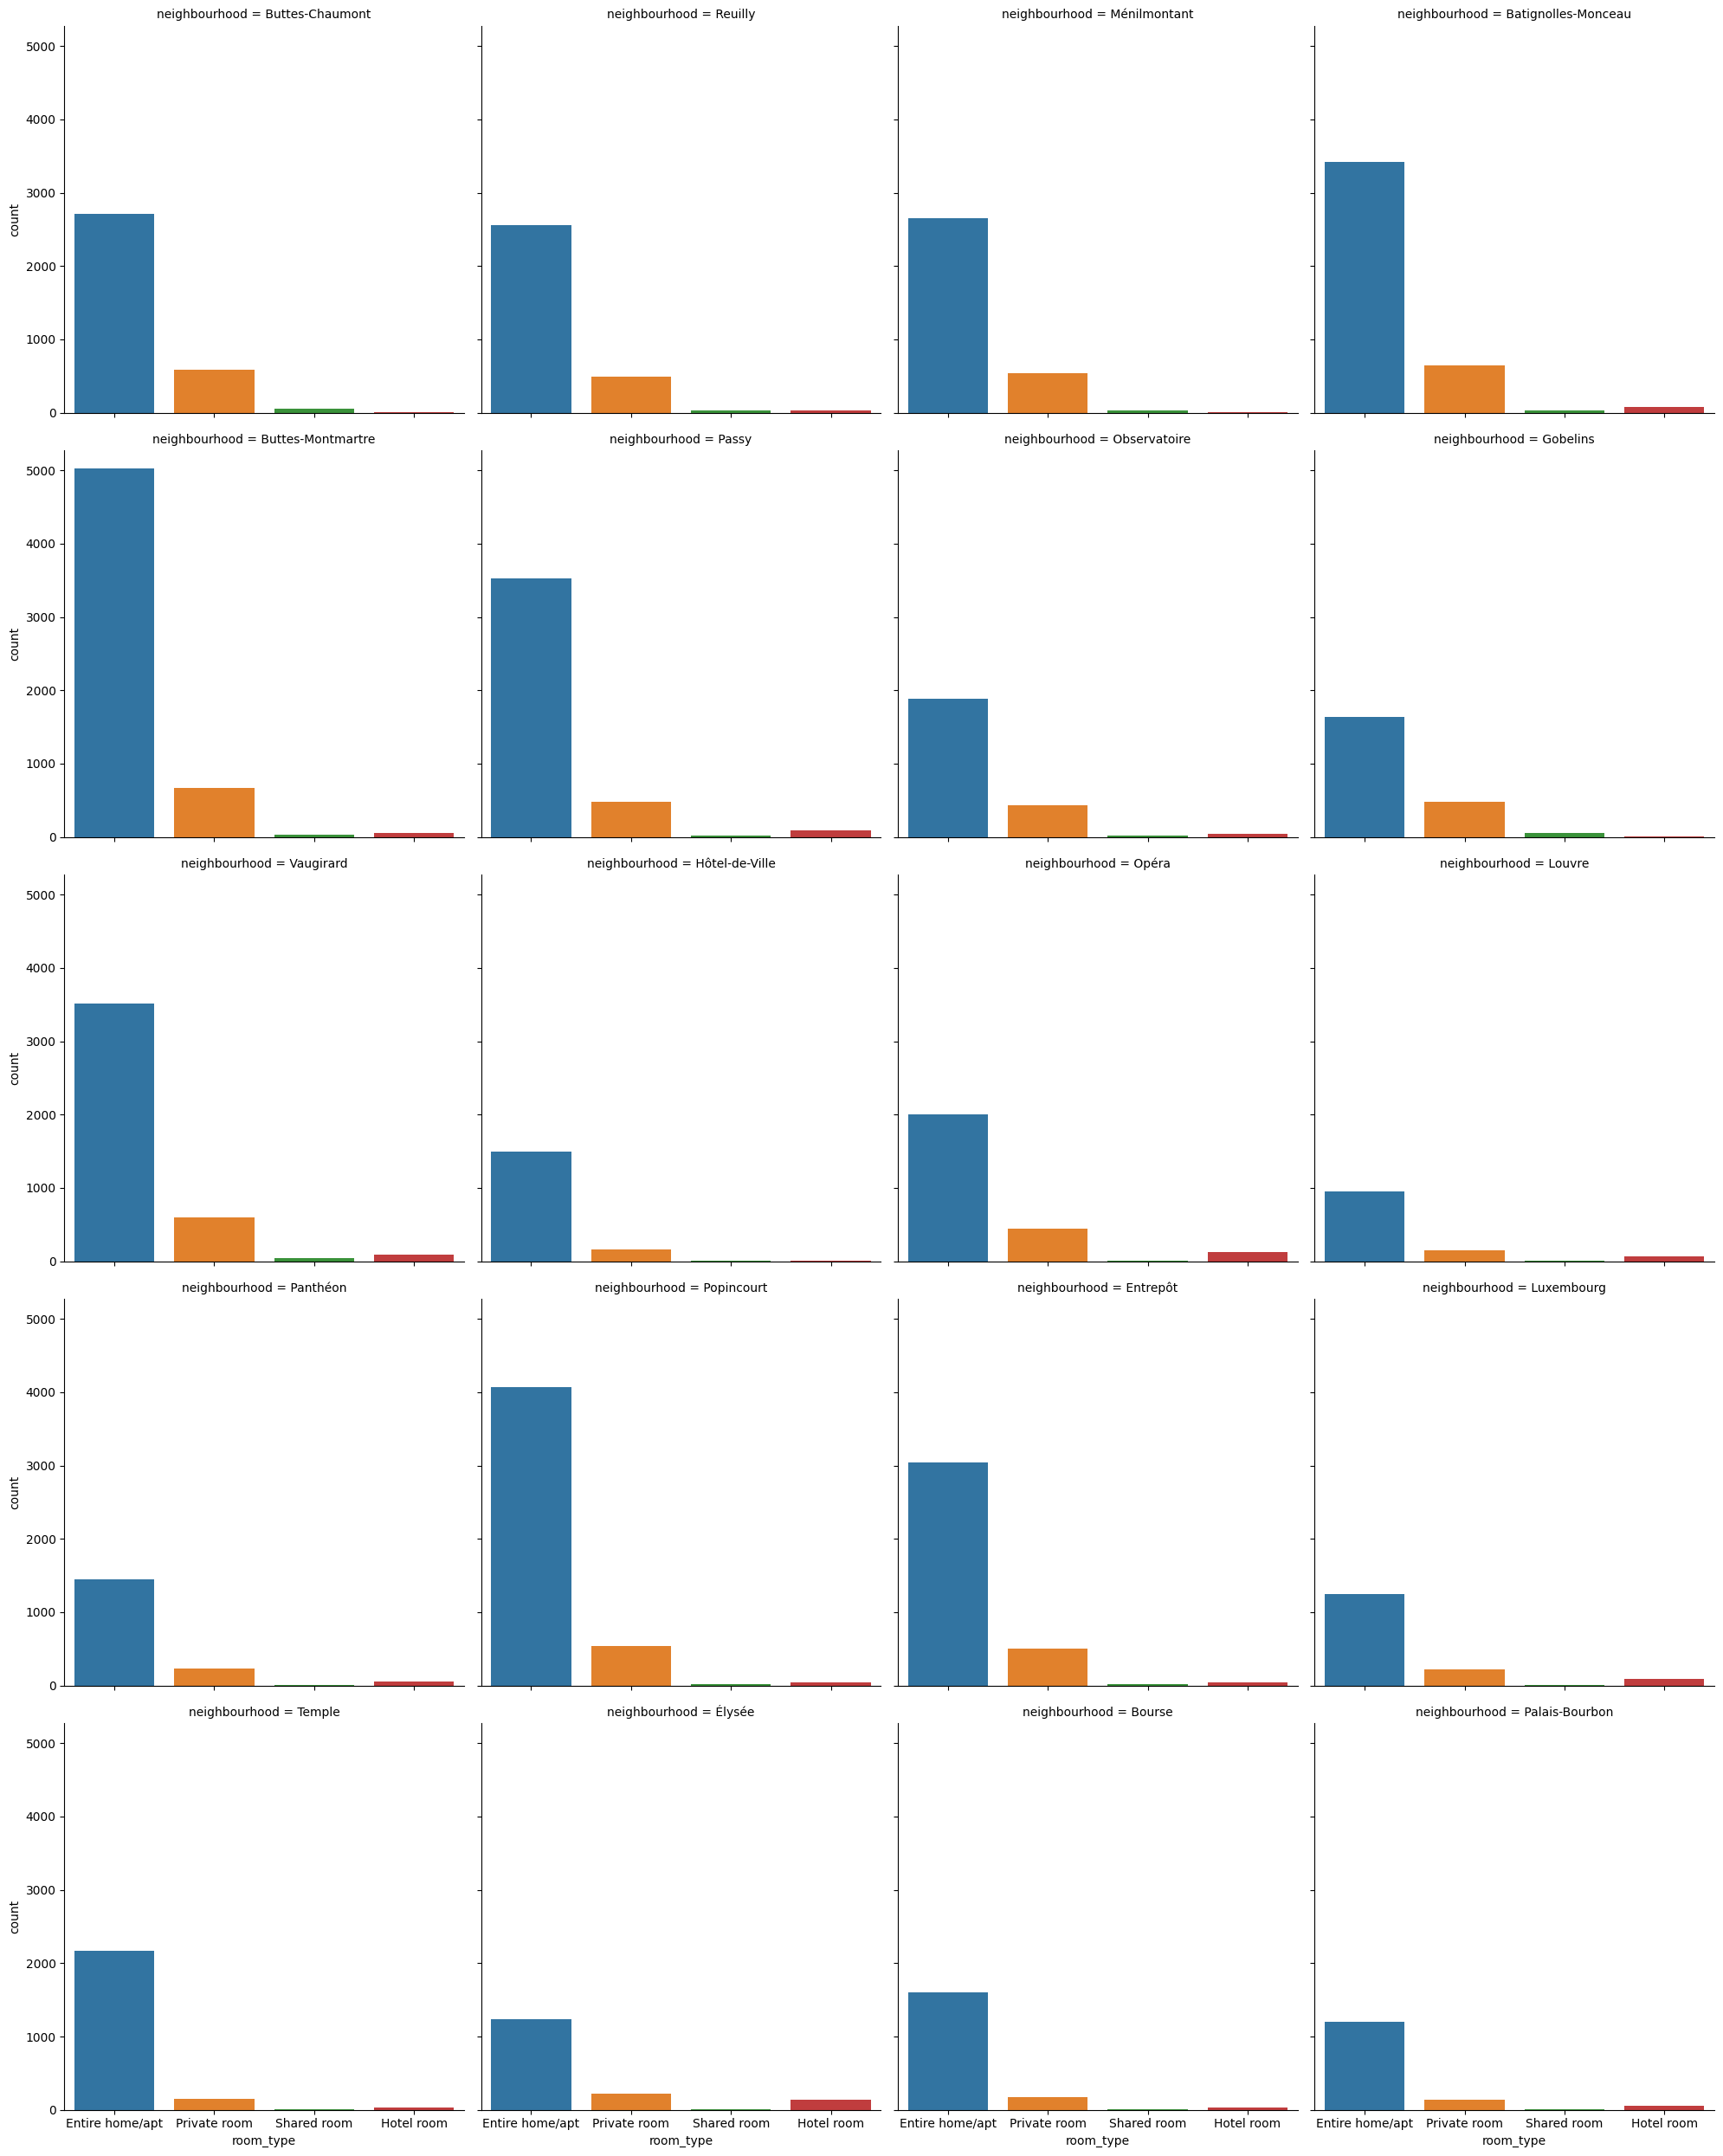

In [40]:
sns.catplot(data=data, x="room_type", kind="count", col="neighbourhood", col_wrap=4)

### Representation des logements 

On va représenter les logements dans un nuage de points, en mettant une couleur par `neighboorhood`

<Axes: xlabel='longitude', ylabel='latitude'>

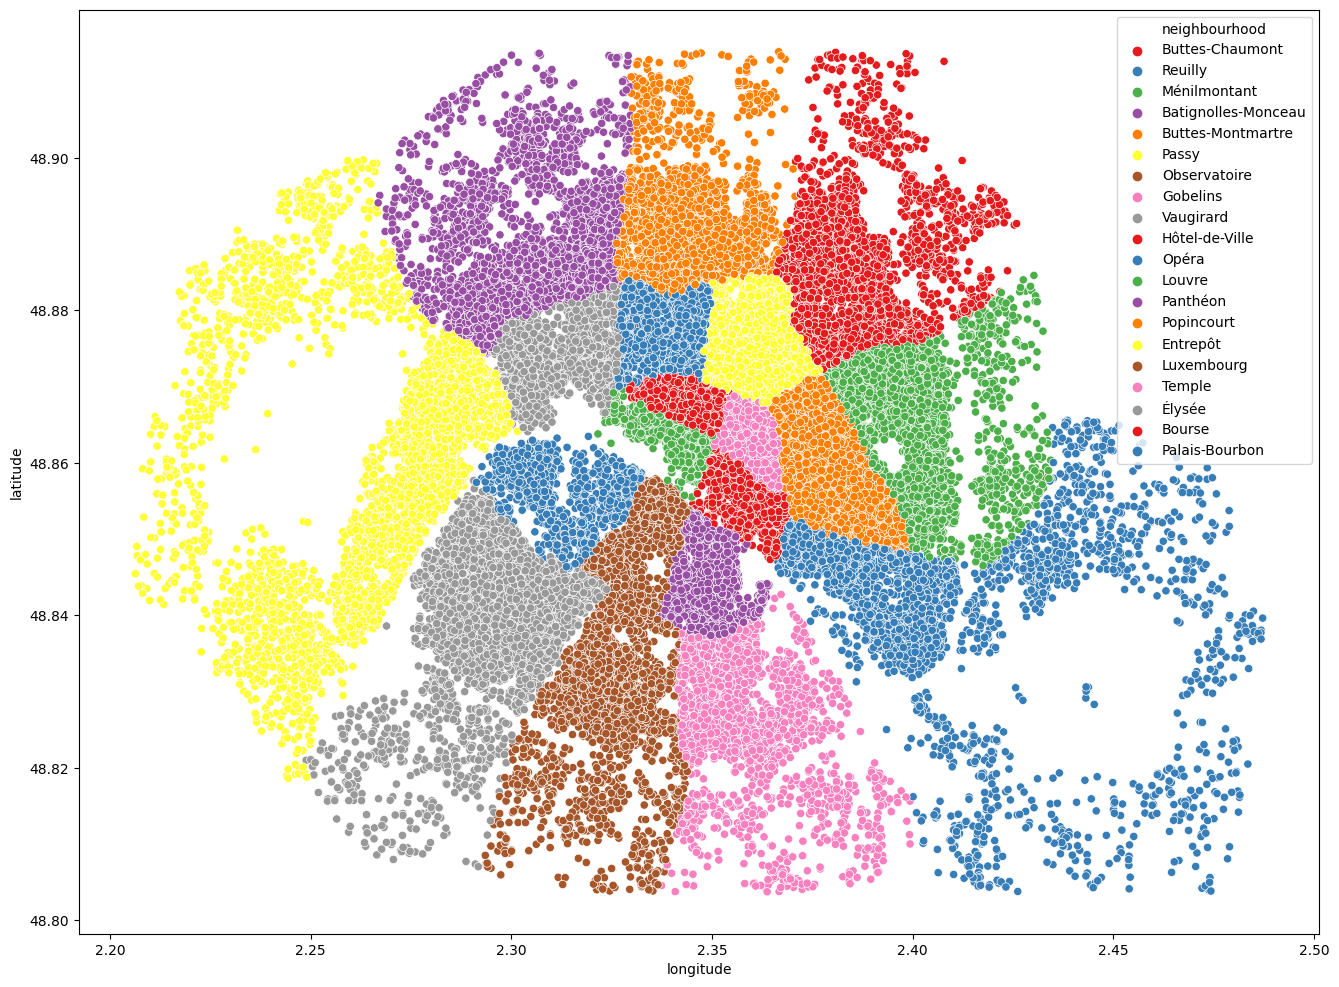

In [41]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=data, x="longitude", y="latitude", hue="neighbourhood", palette="Set1")

### Representation des logements / `price`

<Axes: xlabel='longitude', ylabel='latitude'>

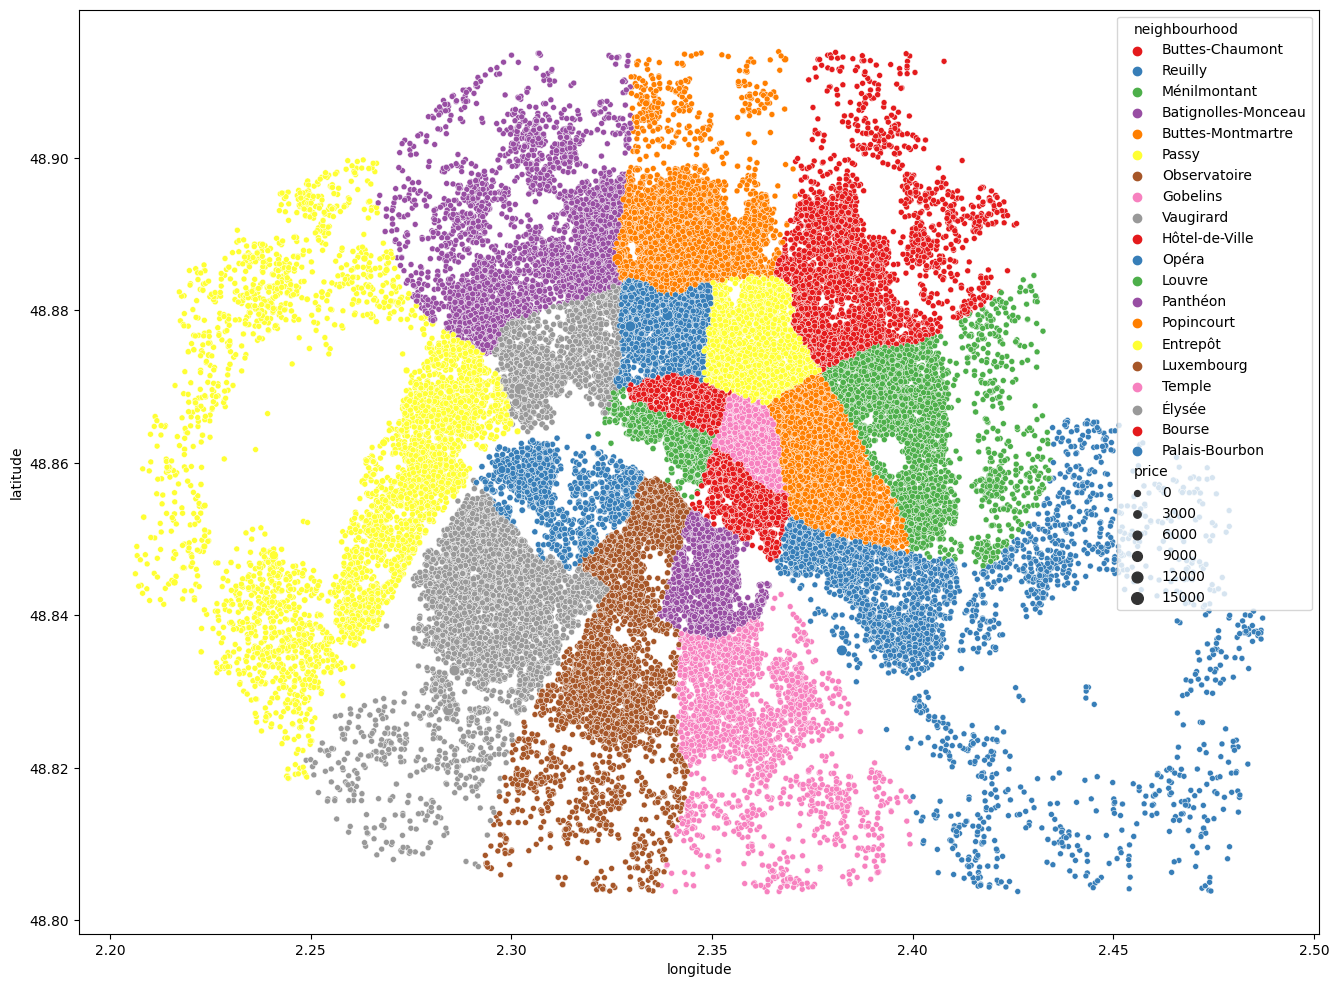

In [42]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=data, x="longitude", y="latitude", hue="neighbourhood", size="price", palette="Set1")